## Generate random numbers following a PDF

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
F = integrate.quad( lambda x: x**2, 0, 1)
F

(0.3333333333333333, 3.700743415417188e-15)

In [3]:
def x2(x):
    return x**2/F[0]

In [4]:
integrate.quad( x2, 0, 1 )

(1.0000000000000002, 1.1102230246251569e-14)

In [5]:
theta = np.linspace(0, np.pi/2, 200)
costh = np.cos(theta)

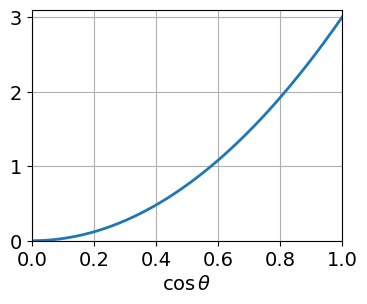

In [6]:
fig, ax = plt.subplots( figsize = (4, 3) )  
ax.plot(costh, x2(costh), lw = 2 )

ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
ax.set_ylim( [0, 3.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

In [7]:
def cdf(costh):
    return (1.-costh**3)/(3*F[0])

In [8]:
def inv_cdf(c):
    return np.cbrt(1-3*c*F[0])

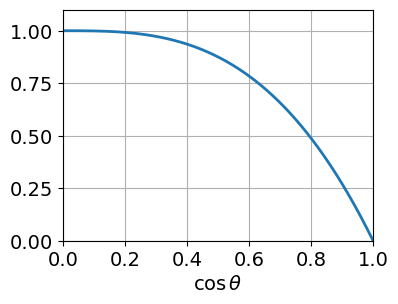

In [9]:
fig, ax = plt.subplots( figsize = (4, 3) )  
ax.plot(costh, cdf(costh), lw = 2 )

ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
ax.set_ylim( [0, 1.1])

ax.grid(":")

In [10]:
# randSolidAngle = np.array([
#     [costh, phi]
#     for costh, phi in zip(np.random.default_rng().uniform(0, 1, 10000), np.random.default_rng().uniform(0, 2*np.pi, 10000))])


nSamples = 10000
uniformCosth = np.random.default_rng().uniform(0, 1, nSamples)
SolidAngle = np.array([
    [costh, phi]
    for costh, phi in zip(inv_cdf(uniformCosth), np.random.default_rng().uniform(0, 2*np.pi, nSamples))])
SolidAngle

array([[0.95993347, 0.90041291],
       [0.7819377 , 3.19264137],
       [0.48750642, 4.05988537],
       ...,
       [0.36944891, 4.92812324],
       [0.8594549 , 3.2712578 ],
       [0.35005976, 4.09519794]])

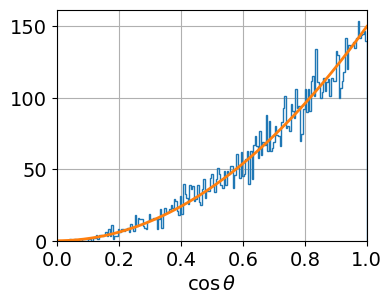

In [11]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(SolidAngle[:,0], bins = np.linspace(0, 1, 200), histtype = 'step')
ax.plot(costh, x2(costh)*50, lw = 2 )

ax.set_xlabel( r'$\cos\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 1])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

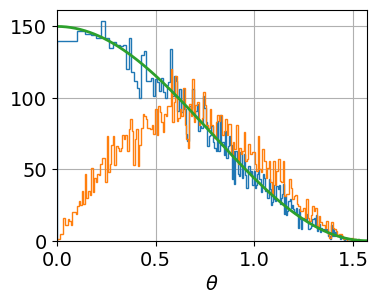

In [12]:
arccosbin = np.arccos(np.linspace(0, 1, 200))
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(np.arccos(SolidAngle[:,0]), bins = np.flip(arccosbin), histtype = 'step')
ax.hist(np.arccos(SolidAngle[:,0]), bins = np.linspace(0, np.pi/2, 200), histtype = 'step')
ax.plot(np.arccos(costh), x2(costh)*50, lw = 2 )

ax.set_xlabel( r'$\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, np.pi/2])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

In [38]:
# np.set_printoptions(threshold=np.inf)
# inv_cdf(randSolidAngle[:,0])

array([0.92197521, 0.93597681, 0.93914107, 0.74204039, 0.83358651,
       0.8285485 , 0.87687717, 0.90886668, 0.78713596, 0.78605401,
       0.94548454, 0.93665471, 0.99217931, 0.5984996 , 0.88032116,
       0.7064072 , 0.49927747, 0.75943663, 0.90406789, 0.9131707 ,
       0.84421042, 0.94294027, 0.55579698, 0.87193838, 0.68477491,
       0.99766423, 0.45987528, 0.54749323, 0.9283203 , 0.99176134,
       0.41851033, 0.43267451, 0.85952159, 0.68959111, 0.98551476,
       0.84944076, 0.96184306, 0.58681734, 0.30932049, 0.96932876,
       0.29272685, 0.7236866 , 0.40984321, 0.82694998, 0.4788499 ,
       0.76187344, 0.98722224, 0.90959621, 0.66086796, 0.96761553,
       0.43762381, 0.9244035 , 0.95744835, 0.42894605, 0.90163276,
       0.63431713, 0.29415027, 0.5711574 , 0.84849715, 0.91346565,
       0.46276883, 0.79331307, 0.56083541, 0.9699759 , 0.74001432,
       0.5142903 , 0.70251402, 0.29587366, 0.96376479, 0.85205531,
       0.90966659, 0.92889832, 0.82153395, 0.86814893, 0.54302

In [13]:
theta = np.linspace(0, np.pi/2, 200)

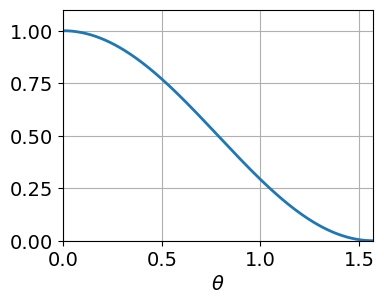

In [14]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.plot(theta, np.cos(theta)**2, lw = 2 )

ax.set_xlabel( r'$\theta$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, np.pi/2])
ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )

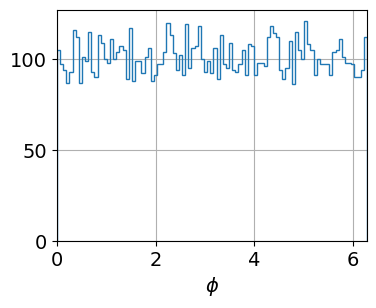

In [16]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(SolidAngle[:,1], bins = np.linspace(0, 2*np.pi, 100), histtype = 'step')

ax.set_xlabel( r'$\phi$', fontsize = 14 )
# ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 2*np.pi])
# ax.set_ylim( [0, 1.1])

ax.grid(":")
# ax.legend( fontsize = 16 )